In [144]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

import json

import _pickle as cPickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
# load json file
for day in range(20210601,20210622):
    day = str(day)
    with open('/home/kbrennan/phd/data/climate/tracks/present/test/cell_tracks_'+day+'.json', 'r') as f:
        js_new = json.load(f)

    with open('/home/kbrennan/phd/data/climate/tracks/present/cell_tracks_'+day+'.json', 'r') as f:
        js_old = json.load(f)

    ds = xr.open_dataset('/home/kbrennan/phd/data/climate/tracks/present/test/cell_swaths_'+day+'.nc')

    print(np.round(len(js_new['cell_data'])/len(js_old['cell_data']),2),len(js_new['cell_data']),len(js_old['cell_data']))

0.45 14 31
0.54 20 37
0.42 21 50
0.86 19 22
0.91 63 69
1.69 22 13
1.93 27 14
0.71 48 68
0.58 11 19
2.08 27 13
0.67 18 27
0.1 3 30
0.08 4 51
0.04 2 53
0.3 10 33
0.46 25 54
1.02 49 48
0.67 34 51
1.09 123 113
0.86 125 145
0.95 146 153


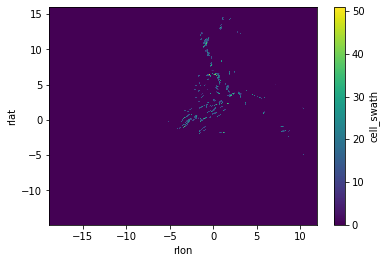

In [146]:
ds.cell_swath.max(dim='cell_id').plot()

In [147]:
ds_5min = xr.open_mfdataset('/home/kbrennan/phd/data/climate/5min_2D/present/lffd'+day+'_0606.nz')

In [148]:
daily_max = ds_5min['DHAIL_MX'].max(dim='time').values

In [149]:
window_size = 50
center = (780,980)
crop = daily_max[center[0]-window_size:center[0]+window_size,center[1]-window_size:center[1]+window_size]

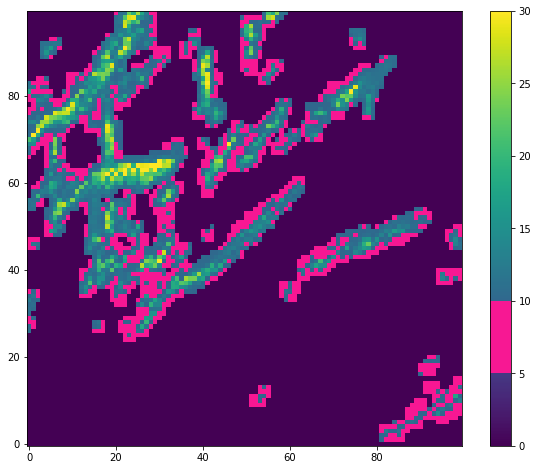

In [150]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 300))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[50:100, :] = pink
newcmp = ListedColormap(newcolors)

filled = ax.imshow(crop,cmap=newcmp,vmin=0,vmax=30,origin='lower')
fig.colorbar(filled)
